In [2]:
import numpy as np
import pandas as pd

data=pd.read_csv("/content/data.csv",encoding='unicode_escape')
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [7]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text_tokenize = re.split('\W+', text)
    text_nostop = [word for word in text_tokenize if word not in stopwords]
    #text_stemm = [ps.stem(x) for x in text_nostop]
    text_lemm = [wn.lemmatize(x) for x in text_nostop]
    return text_lemm

data['text_clean'] = data['Sentence'].apply(lambda x: clean_text(x.lower()))

data.head()
     

,Sentence,Sentiment,text_clean
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive,"[geosolutions, technology, leverage, benefon, gps, solution, providing, location, based, search, technology, community, platform, location, relevant, multimedia, content, new, powerful, commercial, model, ]"
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative,"[esi, low, 150, 250, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive,"[last, quarter, 2010, componenta, net, sale, doubled, eur131m, eur76m, period, year, earlier, moved, zero, pretax, profit, pretax, loss, eur7m, ]"
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral,"[according, finnishrussian, chamber, commerce, major, construction, company, finland, operating, russia, ]"
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral,"[swedish, buyout, firm, sold, remaining, 224, percent, stake, almost, eighteen, month, taking, company, public, finland, ]"


In [8]:
import gensim
data['text_clean_gensim']=data.Sentence.apply(lambda x: gensim.utils.simple_preprocess(x))
data.head()

,Sentence,Sentiment,text_clean,text_clean_gensim
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive,"[geosolutions, technology, leverage, benefon, gps, solution, providing, location, based, search, technology, community, platform, location, relevant, multimedia, content, new, powerful, commercial, model, ]","[the, geosolutions, technology, will, leverage, benefon, gps, solutions, by, providing, location, based, search, technology, communities, platform, location, relevant, multimedia, content, and, new, and, powerful, commercial, model]"
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative,"[esi, low, 150, 250, bk, real, possibility]","[esi, on, lows, down, to, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive,"[last, quarter, 2010, componenta, net, sale, doubled, eur131m, eur76m, period, year, earlier, moved, zero, pretax, profit, pretax, loss, eur7m, ]","[for, the, last, quarter, of, componenta, net, sales, doubled, to, eur, from, eur, for, the, same, period, year, earlier, while, it, moved, to, zero, pre, tax, profit, from, pre, tax, loss, of, eur]"
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral,"[according, finnishrussian, chamber, commerce, major, construction, company, finland, operating, russia, ]","[according, to, the, finnish, russian, chamber, of, commerce, all, the, major, construction, companies, of, finland, are, operating, in, russia]"
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral,"[swedish, buyout, firm, sold, remaining, 224, percent, stake, almost, eighteen, month, taking, company, public, finland, ]","[the, swedish, buyout, firm, has, sold, its, remaining, percent, stake, almost, eighteen, months, after, taking, the, company, public, in, finland]"


In [9]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data['text_clean'],data['Sentiment'],test_size=0.2)

In [11]:
# Word 2 Vector
w2v_model=gensim.models.Word2Vec(X_train,min_count=1)


In [12]:
vecWords=w2v_model.wv.index2word
X_train_vect=np.array([np.array([w2v_model.wv[i] for i in ls if i in vecWords]) for ls in X_train])
X_test_vect=np.array([np.array([w2v_model.wv[i] for i in ls if i in vecWords]) for ls in X_test])

<ipython-input-12-f5208e3d810e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect=np.array([np.array([w2v_model.wv[i] for i in ls if i in vecWords]) for ls in X_train])
<ipython-input-12-f5208e3d810e>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect=np.array([np.array([w2v_model.wv[i] for i in ls if i in vecWords]) for ls in X_test])


In [13]:
X_train_vect_avg=[]
for v in X_train_vect:
  if v.size:
    X_train_vect_avg.append(v.mean(axis=0))
  else:
      X_train_vect_avg.append(np.zeros(100,dtype=float))

In [14]:
X_test_vect_avg=[]
for v in X_test_vect:
  if v.size:
    X_test_vect_avg.append(v.mean(axis=0))
  else:
      X_test_vect_avg.append(np.zeros(100,dtype=float))

In [15]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_vect_avg,y_train)

RandomForestClassifier()

In [16]:
from sklearn import metrics
y_pred=clf.predict(X_test_vect_avg)
metrics.accuracy_score(y_pred,y_test)

0.5457656116338752

In [18]:
## CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['Sentence'])
print(X_counts.shape)
#print(count_vect.get_feature_names())
print(count_vect.get_feature_names_out())

(5842, 13562)
['' '0' '00' ... 'Ã³' 'â' 'ð']


In [19]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,0,00,000,000063,0008,001,002,0025,003,...,zloty,zone,zoo,zu,Â,Â¼,Ã,Ã³,â,ð
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5838,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5839,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5840,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X = X_counts_df
y_ohe = pd.get_dummies(data['Sentiment'])

In [22]:
X.shape,y_ohe.shape

((5842, 13562), (5842, 3))

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.10, stratify=y_ohe,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train,
                                                  random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((4468, 13562), (789, 13562), (585, 13562), (4468, 3), (789, 3), (585, 3))

In [24]:
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
validation_x = np.asarray(X_val)
validation_y = np.asarray(y_val)
train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
validation_x = validation_x.reshape((validation_x.shape[0],1,validation_x.shape[1]))
train_x.shape, validation_x.shape
     

((4468, 1, 13562), (789, 1, 13562))

In [28]:
from keras.layers.regularization.dropout import Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(1,train_x.shape[2])))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               8227800   
                                                                 
 batch_normalization_1 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                      

In [29]:
history1=model.fit(train_x,train_y,batch_size=32, epochs=50,verbose=2,validation_data=(validation_x, validation_y ))

Epoch 1/50
140/140 - 3s - loss: 0.8921 - accuracy: 0.6072 - val_loss: 0.9661 - val_accuracy: 0.5640 - 3s/epoch - 21ms/step
Epoch 2/50
140/140 - 1s - loss: 0.5659 - accuracy: 0.7735 - val_loss: 0.8708 - val_accuracy: 0.6515 - 1s/epoch - 9ms/step
Epoch 3/50
140/140 - 1s - loss: 0.3534 - accuracy: 0.8471 - val_loss: 0.7560 - val_accuracy: 0.6882 - 1s/epoch - 8ms/step
Epoch 4/50
140/140 - 1s - loss: 0.2656 - accuracy: 0.8852 - val_loss: 0.8485 - val_accuracy: 0.6527 - 1s/epoch - 8ms/step
Epoch 5/50
140/140 - 1s - loss: 0.2384 - accuracy: 0.8932 - val_loss: 1.1701 - val_accuracy: 0.6793 - 1s/epoch - 8ms/step
Epoch 6/50
140/140 - 1s - loss: 0.1893 - accuracy: 0.8984 - val_loss: 1.3517 - val_accuracy: 0.6768 - 1s/epoch - 8ms/step
Epoch 7/50
140/140 - 1s - loss: 0.1795 - accuracy: 0.9087 - val_loss: 1.4503 - val_accuracy: 0.6515 - 1s/epoch - 8ms/step
Epoch 8/50
140/140 - 1s - loss: 0.1722 - accuracy: 0.9098 - val_loss: 1.6552 - val_accuracy: 0.6705 - 1s/epoch - 8ms/step
Epoch 9/50
140/140 - 1s

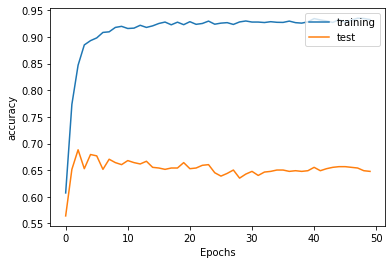

In [30]:
import matplotlib.pyplot as plt
metrics='accuracy'
plt.plot(history1.history[metrics])
plt.plot(history1.history['val_'+ metrics])
plt.xlabel('Epochs')
plt.ylabel(metrics)
plt.legend(['training', 'test'], loc='upper right')
plt.show()

In [36]:
np.argmax(np.array(y_test),axis=1)

array([2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2,
       0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2,
       0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0,
       2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 1,
       1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1,

In [37]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

test_x=np.asarray(X_test)
test_x=test_x.reshape((test_x.shape[0],1,test_x.shape[1]))
test_y = np.argmax(np.array(y_test),axis=1)
y_pred = model.predict(test_x)
test_pred=np.argmax(y_pred,axis=1)

19/19 [==============================] - 0s 4ms/step


In [38]:
test_pred

array([2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1,
       1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1,

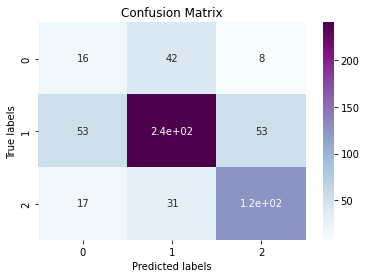

In [39]:
def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix( ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
plot_conf(test_pred,test_y)  